##  Data Driven Insight for Indian Startup Growth

     Business Understanding
The target is to identify the factors that contributing to the StartUp Growth in India 
        

    Hypotheses
  Null Hypothesis (H0):The sector in which a startup operates may not be the determining factor for its success in India.

  Alternative Hypothesis (H1):
The sector in which a startup operates can play a significant role in contributing to its success in India




    Data Understanding
We have collected data from various startups in India spanning the years 2018 to 2021, including information on the amounts they received in funding. By analyzing this data, we aim to gain a deeper insight into the startup ecosystem and identify the key contributing factors.

    Assumptions
    
The amounts in the 2019 dataset are all in USD. Please note that the exchange rate for 2018 is 1 USD = 70 INR.

In [2]:
# importing the necessary libraries
import os, sys
from sqlalchemy import create_engine
import pyodbc # Database Connectivity with  Open Database Connectivity (pyodbc)

from dotenv import dotenv_values # dotenv library to load environment variables
# Lib for data manipulation  analysis and Viz
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

warnings.filterwarnings('ignore')

    Load env Variable and assign Login Credentials 

In [3]:
# Load environment variables from .env file 

environment_variables=dotenv_values('.env')
# Get the values for the  login credentials from  the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("UID")
password = environment_variables.get("PWD")

    Test Credectiom Connection

In [4]:

connection = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"


    connect to the server

In [5]:
# This will connect to the server with help of pyodbc.

con = pyodbc.connect(connection)

      Data Loading with login credections

In [6]:
# Load the dataset SQL query
query1 = "Select * from dbo.LP1_startup_funding2020"
query2 = "Select * from dbo.LP1_startup_funding2021"

In [7]:
# Read data from the  on dataset 
data_2018 = pd.read_csv('dataset\startup_funding2018.csv')
data_2019 = pd.read_csv('dataset\startup_funding2019.csv')
data_2020 = pd.read_sql(query1, con)
data_2021 = pd.read_sql(query2, con)


    Data Overview 

In [8]:
# 2018 dataset overview
data_2018.head(3)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India


In [9]:
# 2019 dataset overview
data_2019.tail(3)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN
88,Ess Kay Fincorp,NaN,Rajasthan,Banking,Organised Non-Banking Finance Company,Rajendra Setia,"TPG, Norwest Venture Partners, Evolvence India","$33,000,000",NaN


In [10]:
# 2020 dataset overview
data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [11]:
# 2021 dataset overview
data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


        Data Cleaning for all datasets

Check Duplications each dataset

In [12]:
# Check Dulpications for 2018 data
data_2018.duplicated().sum()

1

In [13]:
data_2019.duplicated().sum()

0

In [14]:
data_2020.duplicated().sum()

3

In [15]:
data_2021.duplicated().sum()

19

View the Duplications

 Dropping data duplicate

In [16]:
# Drop 2018 data duplicates
data_2018 = data_2018.drop_duplicates()

In [17]:
# Drop 2019 data duplicates
# data_2019 = data_2019.drop_duplicates()

In [18]:
# Drop 2020 data duplicates
data_2020 = data_2020.drop_duplicates()

In [19]:
# Drop 2021 data duplicate
data_2021 = data_2021.drop_duplicates()

Check Dulpication after cleaning


In [20]:
# Check Dulpications for 2018 data
data_2018.duplicated().sum()

0

In [21]:
# Check Dulpications for 2019 data
data_2019.duplicated().sum()

0

In [22]:
# Check Dulpications for 2020 data
data_2020.duplicated().sum()

0

In [23]:
# Check Dulpications for 2021 data
data_2021.duplicated().sum()

0

Checking Missing Values

In [24]:
#check for missing data for 2018
missing_values_2018 = data_2018.isnull().sum
missing_values_2018()


Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

In [25]:
#check for missing data for 2019
missing_values_2019 = data_2019.isnull().sum
missing_values_2019()


Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

In [26]:
#check for missing data for 2020
missing_values_2020 = data_2020.isnull().sum
missing_values_2020()

Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            253
Stage             462
column10         1050
dtype: int64

In [27]:
#check for missing data for 2021
missing_values_2021 = data_2021.isnull().sum
missing_values_2021()

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          61
Amount             3
Stage            421
dtype: int64

Add Year column to all datasets

In [28]:
# Adding a new "Year" column with the value of its value to all rows
data_2018['Year'] = 2018
data_2019['Year'] = 2019
data_2020['Year'] = 2020
data_2021['Year'] = 2021

 Rename columns in 2018 and 2019 datasets

In [29]:
data_2018.rename(columns={'Company Name':'Company_Brand','Industry':'Sector','Round/Series':'Stage','Location':'HeadQuarter','About Company':'What it does'} ,inplace=True)
data_2019.rename(columns={'Company/Brand':'Company_Brand','Amount($)':'Amount'},inplace=True)



 columns section for data analysis

In [30]:
# Select the specified columns for analysis
data_2018_selected = data_2018[['Company_Brand','HeadQuarter','Sector','Amount','Stage', 'Year']]
data_2019_selected = data_2019[['Company_Brand','HeadQuarter','Sector','Amount','Stage','Year']]
data_2020_selected = data_2020[['Company_Brand','HeadQuarter','Sector','Amount','Stage','Year']]
data_2021_selected = data_2021[['Company_Brand','HeadQuarter','Sector','Amount','Stage','Year']]




 Combine all datasets into one dataframe combinedData

In [31]:
# concatinate the tables
combinedData= pd.concat([data_2018_selected,data_2019_selected,data_2020_selected,data_2021_selected],ignore_index=True)

In [32]:
combinedData.tail(10)

,Company_Brand,HeadQuarter,Sector,Amount,Stage,Year
2846,Proeon,Pune,Food Production,$2000000,Seed,2021
2847,InfyU Labs,Gandhinagar,AgriTech,$200000,Seed,2021
2848,TechEagle,Gurugram,Aviation & Aerospace,$500000,Seed,2021
2849,Voxelgrids,Bangalore,Deeptech,$5000000,None,2021
2850,Cogos Technologies,Bangalore,Logistics & Supply Chain,$2000000,Pre-series A,2021
2851,Gigforce,Gurugram,Staffing & Recruiting,$3000000,Pre-series A,2021
2852,Vahdam,New Delhi,Food & Beverages,$20000000,Series D,2021
2853,Leap Finance,Bangalore,Financial Services,$55000000,Series C,2021
2854,CollegeDekho,Gurugram,EdTech,$26000000,Series B,2021
2855,WeRize,Bangalore,Financial Services,$8000000,Series A,2021


Check Amount Columns

In [33]:
combinedData['Amount'].unique()

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60

In [34]:
# Replace  non-numerical values in the 'amount' column with 0
combinedData['Amount'].replace(['—','Undisclosed','None', '$Undisclosed', '$','Upsparks', 'JITO Angel Network, LetsVenture','Series C', 'Seed', '$undisclosed', 'ah! Ventures', 'Pre-series A', 'ITO Angel Network, LetsVenture'], 0, inplace=True)

In [35]:
combinedData['Amount'].unique()

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', 0, '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60,0

To check for the null Values in the Concataned table

In [36]:
combinedData.isna().sum()

Company_Brand      0
HeadQuarter      114
Sector            18
Amount           256
Stage            929
Year               0
dtype: int64

 handling the missing Values

In [37]:
combinedData.fillna(value={'HeadQuarter':'Unknown','Sector':'Unknown','Amount':0,'Stage':'Unknown'},inplace=True)


In [38]:
combinedData.isna().sum()

Company_Brand    0
HeadQuarter      0
Sector           0
Amount           0
Stage            0
Year             0
dtype: int64

To convert the Amount Column to one currency

In [39]:
# Peak a sample data tp overview
combinedData.sample(10)

,Company_Brand,HeadQuarter,Sector,Amount,Stage,Year
2499,Haqdarshak,Jaipur,Finance,"$800,000",Pre-series A,2021
2170,MYSUN,New Delhi,Solar,$2000000,Unknown,2021
907,GPS Renewables,Bangalore,Cleantech,3000000.0,Series A,2020
1129,Text Mercato,Bangalore,Unknown,649600.0,Series A,2020
714,Credgenics,New Delhi,FinTech,3000000.0,Pre-series A,2020
1880,CHARGE+ZONE,Vadodara,Automotive,$10000000,Unknown,2021
2297,Juicy chemistry,Coimbatore,HealthCare,0,Unknown,2021
447,Blackbuck,"Bengaluru, Karnataka, India","Information Services, Internet, Logistics, Sup...","₹2,029,600,000",Series D,2018
1364,Daily Ninja,Haryana,Ecommerce,349800.0,Unknown,2020
2052,KIWI,New Delhi,TaaS startup,"$250,000",Seed,2021


In [40]:
# A function to convert amount to $
def convert_to_usd(amount):
    exchange_rate = 70  # Exchange rate: 1 USD = 70 INR

    # Check if the amount is numeric
    if str(amount).replace(',', '').replace('.', '').isdigit():
        return round(float(amount), 2)
    elif '₹' in str(amount):  # Check if the amount is in INR
        inr_amount = float(str(amount).replace('₹', '').replace(',', ''))  # Remove currency symbol and commas
        round(inr_amount / exchange_rate, 2)
    else:
        return round(float(str(amount).replace('$', '').replace(',', '')), 2)

# Apply the conversion function to the 'Amount' column
combinedData['Amount'] = combinedData['Amount'].apply(convert_to_usd)

In [41]:
combinedData.sample(20)

,Company_Brand,HeadQuarter,Sector,Amount,Stage,Year
1417,Recko,Bangalore,SaaS,6000000.0,Series A,2020
1718,Legitquest,New Delhi,LegalTech,600000.0,Unknown,2021
1977,MediBuddy,Bangalore,EdTech,3000000.0,Debt,2021
166,artbandhu,"Bangalore, Karnataka, India","Digital Media, Internet, Media and Entertainme...",15000.0,Pre-Seed,2018
978,Zomato,Haryana,Food devlivery,100000000.0,Unknown,2020
4,Eunimart,"Hyderabad, Andhra Pradesh, India","E-Commerce Platforms, Retail, SaaS",0.0,Seed,2018
418,Healthkart,"Gurgaon, Haryana, India","E-Commerce, Fitness, Health Care",10000000.0,Venture - Series Unknown,2018
2324,Saarthi Pedagogy,Ahmadabad,EdTech,0.0,$1000000,2021
1418,Furlenco,Bangalore,Ecommerce,10000000.0,Unknown,2020
2133,Droom,Gurugram,Automobile,200000000.0,Unknown,2021


To Rename the Amount Column to show currency

In [42]:
combinedData.rename(columns={'Amount':'Amount($)'}, inplace=True)
combinedData.head()

,Company_Brand,HeadQuarter,Sector,Amount($),Stage,Year
0,TheCollegeFever,"Bangalore, Karnataka, India","Brand Marketing, Event Promotion, Marketing, S...",250000.0,Seed,2018
1,Happy Cow Dairy,"Mumbai, Maharashtra, India","Agriculture, Farming",NaN,Seed,2018
2,MyLoanCare,"Gurgaon, Haryana, India","Credit, Financial Services, Lending, Marketplace",NaN,Series A,2018
3,PayMe India,"Noida, Uttar Pradesh, India","Financial Services, FinTech",2000000.0,Angel,2018
4,Eunimart,"Hyderabad, Andhra Pradesh, India","E-Commerce Platforms, Retail, SaaS",0.0,Seed,2018


handle nan values by imputing by 0

In [43]:
combinedData.isna().sum()

Company_Brand      0
HeadQuarter        0
Sector             0
Amount($)        144
Stage              0
Year               0
dtype: int64

In [44]:
# Handle missing values
combinedData.fillna(0, inplace=True)

In [45]:
combinedData.isna().sum()

Company_Brand    0
HeadQuarter      0
Sector           0
Amount($)        0
Stage            0
Year             0
dtype: int64

Categorize the stage

In [46]:
combinedData['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round', 'Unknown',
       'Fresh funding', 'Pre series A', 'Series G', 'Post series A',
       'Seed funding', 'Seed fund', 'Series F', 'Series B+', 'Seed round',
       'Pre-series A', 'Pre-seed', 'Pre-series', 'Debt', 'Pre-series C',
       'Pre-series B', 'Bridge', 'Series B2', 'Pre- series A', 'Edge',
       'Pre-Series B', 'Seed A', 'Series A-1', 'Seed Funding',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Seed Round', 'Bridge Round', 'Pr

In [47]:
# To handle the speacial strings
combinedData['Stage'] = combinedData['Stage'].replace({'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593':'Unknown'})
combinedData['Stage'] =  combinedData['Stage'].fillna('Unknown')

In [48]:
combinedData['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed', 'Unknown',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round', 'Fresh funding',
       'Pre series A', 'Series G', 'Post series A', 'Seed funding',
       'Seed fund', 'Series F', 'Series B+', 'Seed round', 'Pre-series A',
       'Pre-seed', 'Pre-series', 'Debt', 'Pre-series C', 'Pre-series B',
       'Bridge', 'Series B2', 'Pre- series A', 'Edge', 'Pre-Series B',
       'Seed A', 'Series A-1', 'Seed Funding', 'Pre-seed Round',
       'Seed Round & Series A', 'Pre Series A', 'Pre seed Round',
       'Angel Round', 'Pre series A1', 'Series E2', 'Seed Round',
       'Bridge Round', 'Pre seed round', 'Pre series B', 'Pre series C',
       'Seed Investment', 'Series D1', 'Mid series', 'Series C, D',

In [49]:
def categorize_funding_stage(stage):

    pre_Seed = ['Pre Seed','Pre seed round']
    seed_stages = ['Seed','Seed funding', 'Seed fund', 'Seed round', 'Seed A', 'Seed Round & Series A', 'Seed Investment', 'Early seed']
    pre_series = [ 'Pre series A', 'Pre-series A1', 'Pre Series A', 'Pre series A1', 'Pre-series A1', 'Pre series A', 'Pre series','Pre series B', 'Pre series C']
    series = ['Series A', 'Series A 1', 'Series A+', 'Seies A', 'Series A1', 'Series A2','Series B', 'Series B+', 'Series B2', 'Series B3','Series C', 'Series D', 'Series D1', 'Series E', 'Series E2', 'Series F', 'Series F1', 'Series F2', 'Series G', 'Series H', 'Series I']
    later_stages = ['Series Unknown','Angel Round' ,'Angel','Corporate Round', 'Funding Round', 'Mid series', 'Bridge', 'Bridge Round', 'Post series A', 'Post-IPO Equity', 'Secondary Market', 'Non-equity Assistance','Fresh funding', 'Grant', 'Undisclosed']
    debt = ['Post-IPO Debt','Debt Financing','Debt']
    others= ['Unknown', '$1200000', '$300000', '$6000000', '$1000000']
 
    if stage in pre_Seed:
        return 'Pre Seed Stage'
    elif stage in seed_stages:
        return 'Seed Stage'
    elif stage in pre_series:
        return 'Pre Series Stage'
    elif stage in series:
        return 'Series Stage'
    elif stage in later_stages:
        return 'Later Stage'
    elif stage in debt:
        return 'Debt Stage'
    else:
        return 'Others'

# Apply the function to the 'Stage' column
combinedData['Stage'] = combinedData['Stage'].apply(categorize_funding_stage)

In [50]:
# test my function
combinedData.sample(5)

,Company_Brand,HeadQuarter,Sector,Amount($),Stage,Year
2438,AMPM,Gurugram,E-commerce,200000.0,Others,2021
867,Fleetx,Gurugram,Tech Startup,3000000.0,Others,2020
1102,TrulyMadly Matchmakers,Gurugram,Dating app,110000.0,Others,2020
191,Shape (School Health and Physical Education),"Pune, Maharashtra, India",Education,200000.0,Seed Stage,2018
339,OPEN,"Bangalore, Karnataka, India",Banking,0.0,Seed Stage,2018


In [51]:
combinedData['Stage'].unique()

array(['Seed Stage', 'Series Stage', 'Later Stage', 'Others',
       'Debt Stage', 'Pre Series Stage', 'Pre Seed Stage'], dtype=object)

In [52]:
# To clean the 'HeadQuarter' Column
# Split the strings from the comma(,) then return the first index of the string 

combinedData['HeadQuarter'] = (combinedData['HeadQuarter'].str.split(',').str[0])


In [53]:
combinedData['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New Delhi',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Bangalore City', 'Belgaum', 'Thane', 'Margão',
       'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow', 'Unknown',
       'Telangana', 'Gurugram', 'Surat', 'Uttar pradesh', 'Rajasthan',
       'Tirunelveli', 'Singapore', 'Gujarat', 'Kerala', 'Frisco',
       'California', 'Dhingsara', 'New York', 'Patna', 'San Francisco',
       'San Ramon', 'Paris', 'Plano', 'Sydney', 'San Francisco Bay Area',
       'Bangaldesh', 'London', 'Milano', 'Palmwoods', 'France',
       'Samastipur', 

In [54]:

# Function to categorize sectors
def categorize_sector(sector):
    # Mapping of sectors to categories
    sector_categories = {
        'Marketing': ['Brand Marketing', 'Event Promotion', 'Marketing', 'Sponsorship', 'Ticketing'],
        'Agriculture': ['Agriculture', 'Farming'],
        'Technology': ['E-Commerce', 'Internet', 'Apps', 'SaaS', 'Information Technology', 'Blockchain', 'Developer Tools'],
        'Healthcare': ['Health Care', 'Medical', 'Biotechnology', 'Pharmaceutical'],
        'Automotive': ['Automotive', 'Electric Vehicle', 'Autonomous Vehicles'],
        'Logistics': ['Logistics', 'Supply Chain Management', 'Transportation'],
        'Education': ['EdTech', 'Education', 'E-Learning', 'Higher Education'],
        'Food and Beverage': ['Food and Beverage', 'Food Delivery', 'Food Processing'],
        'Energy': ['Renewable Energy', 'Clean Energy', 'Solar', 'Energy Storage'],
        'Fashion': ['Fashion', 'Lifestyle'],
        'Real Estate': ['Real Estate'],
        'Finance': ['Finance', 'Financial Services', 'FinTech', 'Venture Capital', 'Payments', 'Wealth Management', 'Credit', 'Financial Services', 'Lending', 'Marketplace', 'Insurance', 'Payments'],
        'Media and Entertainment': ['Media and Entertainment', 'Broadcasting', 'Music', 'Video Streaming'],
    }

    # Iterate through categories and check if the sector belongs to any category
    for category, keywords in sector_categories.items():
        if any(keyword.lower() in sector.lower() for keyword in keywords):
            return category

    # If no category is matched, return 'Other'
    # return 'Other Category'

# Apply the function to the 'Sector' column
combinedData['Sector'] = combinedData['Sector'].apply(categorize_sector)

In [55]:
# peak the cleaned data
combinedData.head(1)

,Company_Brand,HeadQuarter,Sector,Amount($),Stage,Year
0,TheCollegeFever,Bangalore,Marketing,250000.0,Seed Stage,2018



Exploratory Data Analysis (EDA)

Visualize Data

1. What is the distribution of funding across various investment stages

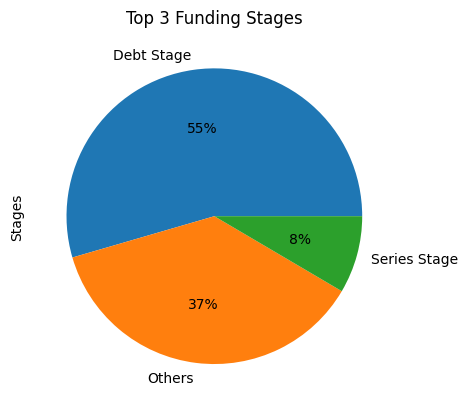

In [56]:
# Visualize information using a pie chart.
Stages = combinedData.groupby('Stage')['Amount($)'].sum().nlargest(3)

Stages.plot(kind='pie', autopct='%1.0f%%')
plt.ylabel('Stages')
plt.title('Top 3 Funding Stages')
plt.show()

2. What are the top 5 dominant sectors among startups 

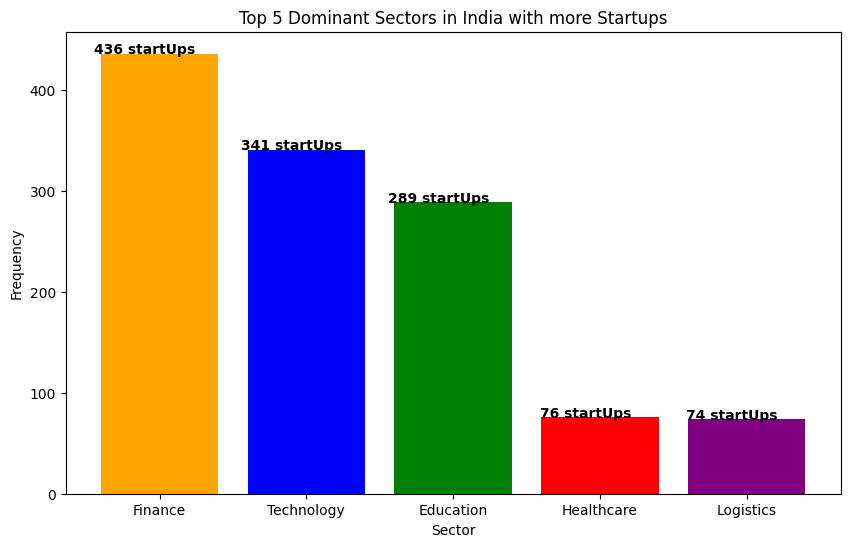

In [57]:

combinedData['Sector'] = combinedData['Sector'].str.capitalize()
tp_5_sectors = combinedData['Sector'].value_counts().head(5)

# Define different colors for each bar
colors = ['orange', 'blue', 'green', 'red', 'purple']

# Create a bar chart with values on each bar
plt.figure(figsize=(10, 6))
bars = plt.bar(tp_5_sectors.index, tp_5_sectors, color=colors)

# Add values on each bar
for bar, value in zip(bars, tp_5_sectors):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1,
    bar.get_height() + 0.1, str(value) + ' startUps',
    ha='center', 
    color='black', 
    fontweight='bold' )

plt.xlabel('Sector', loc='center')
plt.ylabel('Frequency')
plt.title('Top 5 Dominant Sectors in India with more Startups')
plt.show()

3. What are the cities that have attracted the most funding

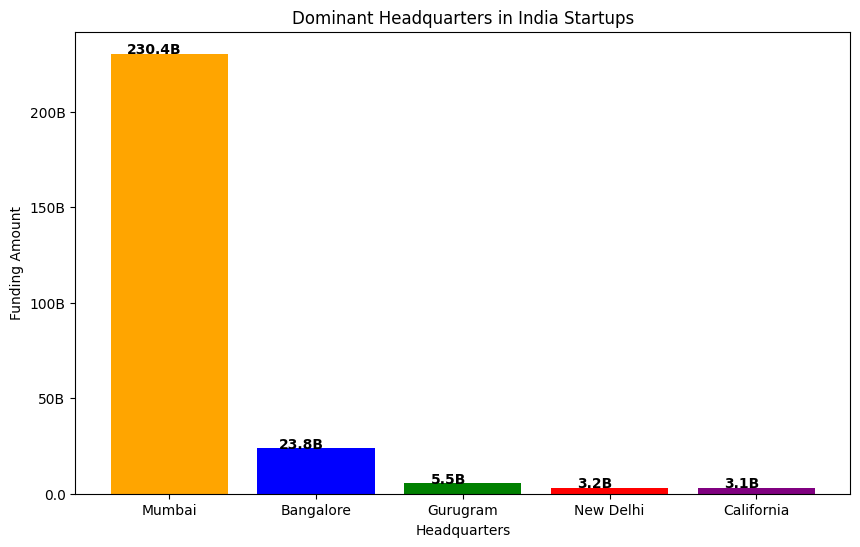

In [58]:
Top_Funded_cities = combinedData.groupby(['HeadQuarter'])['Amount($)'].sum().nlargest(5)

# Create a bar chart with values on each bar
plt.figure(figsize=(10, 6))
bars = plt.bar(Top_Funded_cities.index, Top_Funded_cities, color=colors)

# Add values on each bar with 'M', 'B', or no suffix
for bar, value in zip(bars, Top_Funded_cities):
    if value == 1000:
        text_value = '1000'
    else:
        text_value = (
            f'{value / 1e9:.1f}B' if value >= 1e9 else
            f'{value / 1e6:.1f}M' if value >= 1e6 else
            f'{value / 1e3:.1f}K' if value >= 1e3 else
            f'{value}'
        )

    plt.text(
        bar.get_x() + bar.get_width() / 2 - 0.1,
        bar.get_height() + 0.1,
        text_value,
        ha='center',
        color='black',
        fontweight='bold'
    )

# Format y-axis ticks in billions and millions
formatter = FuncFormatter(lambda x, _: f'{"%.0fB" % (x / 1e9) if x >= 1e9 else "%.0fM" % (x / 1e6) if x >= 1e6 else "%.0fK" % (x / 1e3) if x >= 1e3 else x}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Headquarters', loc='center')
plt.ylabel('Funding Amount')
plt.title('Dominant Headquarters in India Startups')

plt.show()


4. What is the distribution of funding across the four years

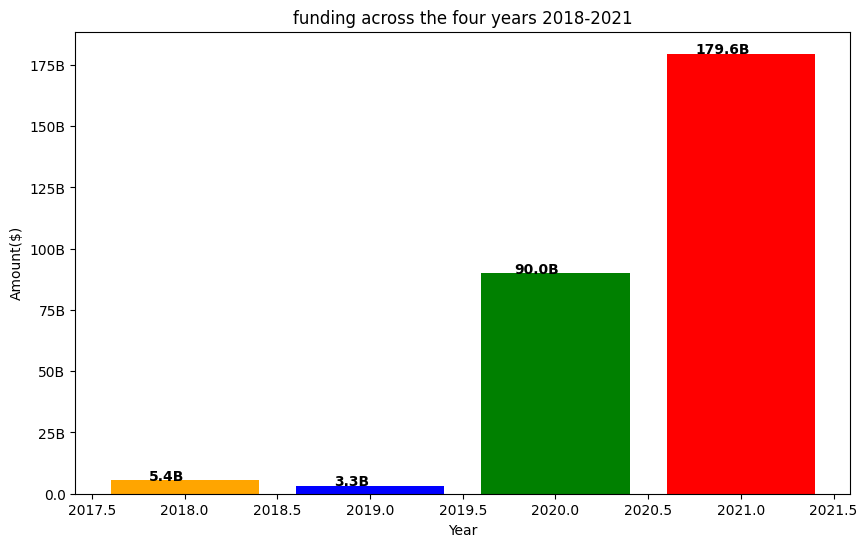

In [70]:

# Group by year and sum the funding amounts
year_funds = combinedData.groupby(['Year'])['Amount($)'].sum()

# Define different colors for each bar
colors = ['orange', 'blue', 'green', 'red', 'purple']

# Create a bar chart with values on each bar
plt.figure(figsize=(10, 6), dpi=100)
bars = plt.bar(year_funds.index, year_funds, color=colors)

# Add values on each bar with 'M', 'B', or no suffix
for bar, value in zip(bars, year_funds):
    if value == 1000:
        text_value = '1000'
    else:
        text_value = (
            f'{value / 1e9:.1f}B' if value >= 1e9 else
            f'{value / 1e6:.1f}M' if value >= 1e6 else
            f'{value / 1e3:.1f}K' if value >= 1e3 else
            f'{value}'
        )

    plt.text(
        bar.get_x() + bar.get_width() / 2 - 0.1,
        bar.get_height() + 0.1,
        text_value,
        ha='center',
        color='black',
        fontweight='bold'
    )

# Format y-axis ticks in billions and millions
formatter = FuncFormatter(lambda x, _: f'{"%.0fB" % (x / 1e9) if x >= 1e9 else "%.0fM" % (x / 1e6) if x >= 1e6 else "%.0fK" % (x / 1e3) if x >= 1e3 else x}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Year')
plt.ylabel('Amount($)')
plt.title('funding across the four years 2018-2021')
plt.show()


 5. What is the distribution of the number of companies that received funding in each year from 2018 to 2021?


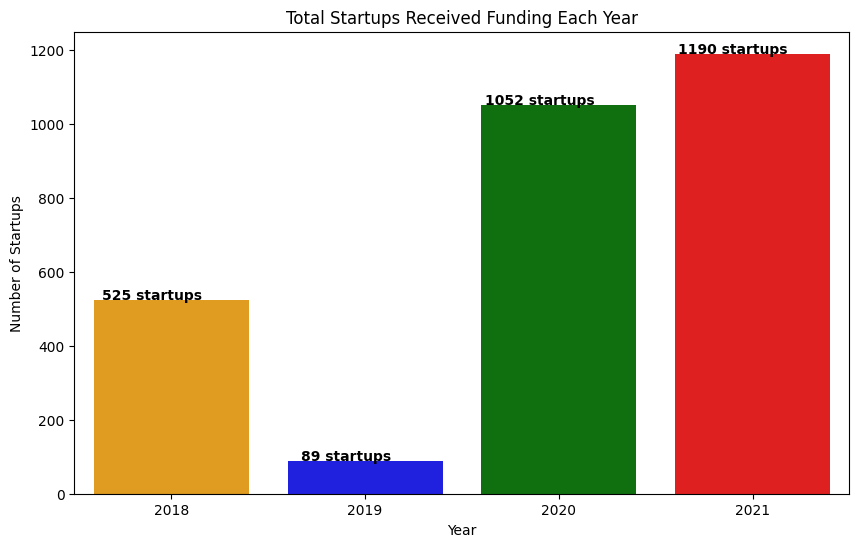

In [87]:

# Count the number of startups in each year
startups_count = combinedData.groupby(['Year'])['Company_Brand'].count().reset_index()

# Create a bar chart with values on each bar
plt.figure(figsize=(10, 6))
ax = sns.barplot(y=startups_count['Company_Brand'], x=startups_count['Year'], palette=colors)

# Add count values on top of each bar
for bar, count in zip(ax.patches, startups_count['Company_Brand']):
    plt.text(
        bar.get_x() + bar.get_width() / 2 - 0.1 ,
        bar.get_height() + 0.1,
        f'{count}' + ' startups',
        ha='center',
        color='black',
        fontweight='bold'
    )

plt.title('Total Startups Received Funding Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Startups')
plt.show()


Conclusion

The analysis suggests a dynamic and growing startup ecosystem, with a diverse range of sectors attracting substantial funding. The concentration of funding in specific cities, such as Mumbai, Bangalore, and Gurugram, highlights the importance of geographical factors in the startup landscape. The upward trend in funding over the years, particularly the significant increase in 2021, indicates a robust and expanding startup ecosystem. However, it's essential to consider external factors and market conditions that may influence funding trends. The findings provide valuable insights for investors interested in the startup ecosystem in India Startups.